# One-Hot Encoding
全面的SMILES字符串的一热编码（One-Hot Encoding）流程，涉及数据预处理、处理双字母元素、填充序列以及最终将其编码为固定大小的矩

### 内容在理论中 ¶

- 分子数据和表示
  -  ChEMBL 数据库
  - SMILES 结构及规则
- 什么是分类数据？
  - 什么是分类数据的难题？
  - 如何将分类数据转换为数值数据？
- 单热编码（OHE）概念
  - 为什么使用独热编码？
  - 示例：one-hot 编码
  - 优势与不足：one-hot 编码
- 类似：整数或标签编码
-  什么是填充？
-  更多阅读

###  内容在实用篇中

- 导入必要的包
-  读取输入数据
-  处理数据
  -  两位数替代
  - 计算最长（&最短）SMILES
- Python one-hot 编码实现
  - 单热编码（padding=True）
  -  可视化
    -  最短 SMILES
    -  最长 SMILES
-  补充材料
  - Scikit learn 实现
  -  Keras 实现

## 理论 ¶

### 分子数据与表示

####  ChEMBL 数据库

- ChEMBL 是一个开放的生物活性大规模数据库，包含具有药物特性的分子。
- 近期发布的（版本 25）包含了从超过 72,000 份文档中提取的信息。总计，现在有超过 1.8 百万种化合物和 15 百万个生物活性数据点可用。

#### SMILES 结构及规则

- SMILES（简化分子输入行输入系统）表示法是一种化学表示法，允许用户以计算机可读的线性方式表示分子的化学结构。
- 它包含一系列字母、数字和字符，用于指定分子的原子、它们的连接性、键级和手性。

**一些 SMILES 规范规则**

- 原子 - 用它们的原子符号表示。此外，金属原子用方括号内的符号表示，例如 金 `[Au]` 。
- 单键、双键和三键分别用符号 `-` 、 `=` 和 `#` 表示。单键是默认的，因此无需指定。
- 芳香性 - 虽然原子符号通常使用大写，如 `C` ， `O` ， `S` 和 `N` ；为了指定芳香原子，则使用小写符号，如 `c` ， `o` ， `s` 和 `n` 。有时也使用环中的隐含键（交替 `=` 和 `-` ）来描述芳香原子，如 `C1=CC=CC=C1` 。
- 环 - SMILES 允许用户通过使用数字来识别开环和闭环原子来识别环状结构。例如，在 `C1CCCCC1` 中，第一个碳原子有一个数字“1”，它通过单键与最后一个碳原子连接，该碳原子也有一个数字“1”。得到的结构是环己烷。
- 分支 - 由括号指定，可以是嵌套或排列的。例如，2-丙醇表示为 `CC(O)C` 。

### 什么是分类数据？

分类数据是包含标签而不是数值的变量。一些例子包括：

- 一个“宠物”变量，其值为：“狗”和“猫”。
- 一个“颜色”变量，其值有：“红色”、“绿色”和“蓝色”。
- 一个“place”变量，其值有：“first”，“second”和“third”。

#### 什么是分类数据的难题？

机器学习包括将数学运算通过低级编程语言转换到计算机中。计算机在处理数字方面非常出色。因此，我们必须以某种方式将我们的输入数据转换为数字。有许多机器学习算法不能直接处理分类数据。因此，分类数据必须转换为数值形式，所有输入和输出变量都是数值的

#### 如何将分类数据转换为数值数据？

有许多方法可以将分类值转换为数值值。每种方法对特征集都有其自身的正面和负面影响。以下将重点介绍两种主要方法：独热编码和标签编码。这两种编码器都是 scikit-learn 库（最广泛使用的 Python 库之一）的一部分，用于将文本或分类数据转换为模型期望的数值数据，并能够处理这些数据。

### 单热编码（OHE）概念

单热编码是一种向量表示，其中向量的所有元素都设置为 `0` ，只有一个元素，其值为 `1` 。例如， `[0 0 0 1 0 0]` 是一个单热向量。简单来说，单热编码，也称为二进制编码，是将分类变量以二进制向量的形式进行二进制表示

#### 为什么使用独热编码？

单热编码允许对分类数据进行更丰富的表示。许多机器学习算法难以直接处理分类数据，因此，作为预处理步骤，必须先将分类的标签值转换为数字。这适用于输入和输出变量都是分类数据的情况。

我们也可以直接使用整数编码。这可能适用于存在自然序数关系之间的类别，以及相应的整数值，例如温度标签“冷”、“暖”和“热”。当没有序数关系时，如果允许表示依赖于任何此类关系通过使用整数编码可能对解决问题没有帮助。一个例子可能是标签“狗”和“猫”。

#### 示例：one-hot 编码

让我们通过一个非常简单的例子来了解这个概念。假设我们有一个“颜色”变量，它有三个标签 `red` 、 `blue` 和 `green` 。所有这些标签都必须转换为数字形式，以便与我们的机器学习算法一起工作。这可以通过创建包含所有三个标签的三列新列来完成，使用 `1` 表示相应标签的颜色， `0` 表示其他颜色

#### 优势与不足：one-hot 编码

优势 - 如果分类特征的基数（类别数量）较低（相对于数据量），则独热编码效果最佳。 - 独热编码的优点在于结果是二进制而非序数，并且所有内容都位于正交向量空间中。

缺点 - 在基于分类变量的基础上添加多个列后，维度增加，可能导致计算成本增加。 - 由于虚拟变量（作为特征添加的唯一类别）存在高度多重共线性，可能会影响模型的性能。 - 单独编码可能导致数据集的稀疏性增加（稀疏矩阵是指其中大部分元素为零的矩阵）。

### 相似：整数或标签编码

标签编码，或整数编码，是一种处理分类变量的流行编码技术，且易于反转。在这种技术中，每个标签根据字母顺序分配一个唯一的整数，以便机器能够正确处理。机器学习算法随后可以更好地决定如何操作标签。它是监督学习中结构化数据集的重要预处理步骤。

**标签与独热编码的区别**

这两种编码技术之间没有太大差异，主要取决于数据类型和所使用的模型。例如，如果我们有非序数的分类特征（如狗或猫），则可以使用独热编码。标签编码最适合序数数据，如 `good=0, better=1, best=2` 。另外，当存在许多分类变量时，选择标签编码可能更好，以避免高内存消耗和稀疏性。

###  什么是填充？

填充用于向结果的一热编码矩阵中添加零。存在不同类型的填充，我们在这里选择了零填充。。

 **为什么进行这项操作？**

填充是为了使矩阵的尺寸相等——或者保留高度和宽度——并且在使用作为深度学习模型的输入时不必过多担心张量维度。

 **如何进行？**

填充可以通过使用 numpy.pad 函数来完成，该函数接受多个参数，如需要填充的 `array` ， `pad_width` 表示添加到每个轴边缘的值数，以及默认为“constant”的 `mode` 。

在这个教程中，执行了填充操作

- 隐式地：当在预处理数据上使用 Python 实现进行独热编码时，我们已将字符串的最大长度作为参数，以确保所有生成的独热编码矩阵具有相同的维度
- 明确来说：更多关于这方面的信息可以在补充部分找到，其中我们使用 keras 和 scikit-learn 实现进行 one-hot 编码。

In [ ]:
from pathlib import Path
from warnings import filterwarnings

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

# Silence some expected warnings
filterwarnings("ignore")

In [56]:
from pathlib import Path
import os

# 获取当前工作目录
HERE = Path(os.getcwd())
DATA = HERE / 'data'
if not DATA.exists():
    DATA.mkdir(parents=True, exist_ok=True)
print(DATA)

/Users/wangyang/Desktop/AIGC-in-drug-design/03_One-Hot Encoding/data


In [8]:

df = pd.read_csv(HERE / '../01_Molecular_representation/data/bioactivities_compounds_VEGFR2.csv').reset_index(drop=True)
print(f"Shape of dataframe: {df.shape}\n")

Shape of dataframe: (200, 5)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  200 non-null    object 
 1   IC50                200 non-null    float64
 2   units               200 non-null    object 
 3   smiles              200 non-null    object 
 4   pIC50               200 non-null    float64
dtypes: float64(2), object(3)
memory usage: 7.9+ KB


In [10]:
df.head(3)
# NBVAL_CHECK_OUTPUT

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL5189340,0.023,nM,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,10.638272
1,CHEMBL429743,0.030,nM,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879
2,CHEMBL5186748,0.120,nM,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819


In [12]:
df = df[["molecule_chembl_id", "smiles"]]

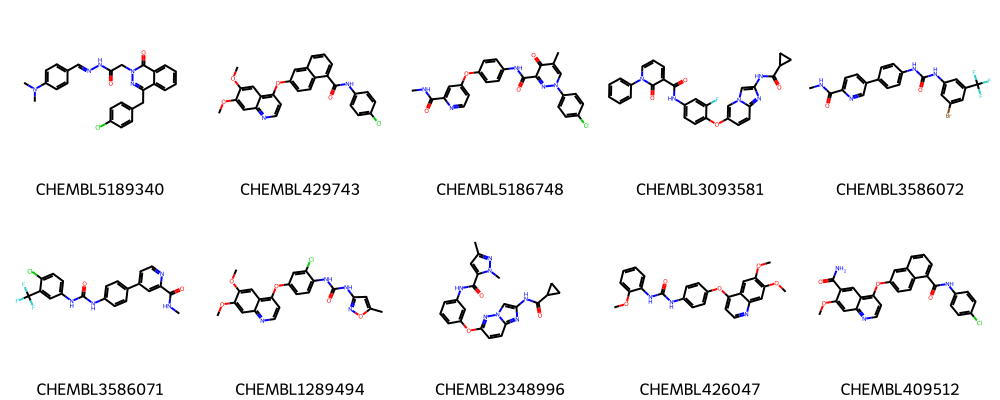

In [14]:
# 使用Pandas Tools和相应的Draw方法
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="smiles", molCol="Mol2D")
Draw.MolsToGridImage(list(df.Mol2D[0:10]), legends=list(df.molecule_chembl_id[0:20]), molsPerRow=5)

### 处理数据

SMILES 预处理：由于在 SMILES 表示中，原子可以用一个或两个字符（取决于它们所代表的周期元素）来描述，而机器将按位置读取输入，因此我们将 SMILES 转换为化学感知表示。

- 首先，我们搜索当前数据集中存在的所有唯一字符，这使我们能够删除当前数据中不存在的字符。
- 其次，我们通过比较字符串中存在的原子与周期表中所有可能存在的元素，在 SMILES 数据集中搜索所有双字符元素，并将所有两个字母元素替换为人工选择的字符，例如将 `Cl` 更改为 `L` 。

 为了填充：

- SMILES 字符串的维度不等，因为它们的字符串长度不同。对于机器学习应用，整个数据集需要具有相同的维度。为了实现这一点，我们首先可以搜索具有最大长度的 SMILES 字符串（例如，使用 len()方法），然后将它作为参数传递给我们的函数，用于所有字符串。

#### 两位数替换

In [23]:
def assess_two_letter_elements(df):
    """
    Find the two letter elements in dataframe.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe which requires preprocessing.

    Returns
    -------
    two_letter_elements : list
        List with found two letter elements
    """

    # Search for unique characters in SMILES strings
    unique_chars = set(df.smiles.apply(list).sum())
    # Get upper and lower case letters only
    upper_chars = []
    lower_chars = []
    for entry in unique_chars:
        if entry.isalpha():
            if entry.isupper():
                upper_chars.append(entry)
            elif entry.islower():
                lower_chars.append(entry)
    print(f"Upper letter characters {sorted(upper_chars)}")
    print(f"Lower letter characters {sorted(lower_chars)}")

    # List of all possible periodic elements
    periodic_elements = [
        "Ac",
        "Al",
        "Am",
        "Sb",
        "Ar",
        "As",
        "At",
        "Ba",
        "Bk",
        "Be",
        "Bi",
        "Bh",
        "B",
        "Br",
        "Cd",
        "Ca",
        "Cf",
        "C",
        "Ce",
        "Cs",
        "Cl",
        "Cr",
        "Co",
        "Cn",
        "Cu",
        "Cm",
        "Ds",
        "Db",
        "Dy",
        "Es",
        "Er",
        "Eu",
        "Fm",
        "Fl",
        "F",
        "Fr",
        "Gd",
        "Ga",
        "Ge",
        "Au",
        "Hf",
        "Hs",
        "He",
        "Ho",
        "H",
        "In",
        "I",
        "Ir",
        "Fe",
        "Kr",
        "La",
        "Lr",
        "Pb",
        "Li",
        "Lv",
        "Lu",
        "Mg",
        "Mn",
        "Mt",
        "Md",
        "Hg",
        "Mo",
        "Mc",
        "Nd",
        "Ne",
        "Np",
        "Ni",
        "Nh",
        "Nb",
        "N",
        "No",
        "Og",
        "Os",
        "O",
        "Pd",
        "P",
        "Pt",
        "Pu",
        "Po",
        "K",
        "Pr",
        "Pm",
        "Pa",
        "Ra",
        "Rn",
        "Re",
        "Rh",
        "Rg",
        "Rb",
        "Ru",
        "Rf",
        "Sm",
        "Sc",
        "Sg",
        "Se",
        "Si",
        "Ag",
        "Na",
        "Sr",
        "S",
        "Ta",
        "Tc",
        "Te",
        "Ts",
        "Tb",
        "Tl",
        "Th",
        "Tm",
        "Sn",
        "Ti",
        "W",
        "U",
        "V",
        "Xe",
        "Yb",
        "Y",
        "Zn",
        "Zr",
    ]

    # The two_char_elements list contains all two letter elements
    # which can be generated by all possible combination of upper x lower characters
    # and are valid periodic elements.
    two_char_elements = []
    for upper in upper_chars:
        for lower in lower_chars:
            ch = upper + lower
            if ch in periodic_elements:
                two_char_elements.append(ch)

    # This list is then reduced to the subset of two-letter elements
    # that actually appear in the SMILES strings, specific to our data set.
    two_char_elements_smiles = set()
    for char in two_char_elements:
        if df.smiles.str.contains(char).any():
            two_char_elements_smiles.add(char)

    return two_char_elements_smiles

In [24]:
elements_found = assess_two_letter_elements(df)
print(f"\nTwo letter elements found in the data set: {sorted(elements_found)}")

Upper letter characters ['B', 'C', 'F', 'H', 'N', 'O', 'S']
Lower letter characters ['c', 'l', 'n', 'o', 'r', 's']

Two letter elements found in the data set: ['Br', 'Cl', 'Cn', 'Sc']


基于这一发现，我们定义了自己的替换字典。请注意，这种简单实现存在一些不足，我们在这里（部分）手动解决：

- 我们排除 `Sc` 和 `Cn` 的替换，因为硫 `S` 和芳香碳 `c` 在一个分子中比钪 `Sc` 更可能存在，同样，碳 `C` 和芳香氮 `n` 比钴 `Cn` 更可能存在。因此，只有氯 `Cl` 、溴 `Br` 和硒 `Se` 被替换。
- 在等价 SMILES 中， `@` 和 `@@` 用于描述对映异构体，因此我们还需要用单个字母代码替换后者。
- 如果您正在使用不同的数据集，您可能需要调整以下映射字典。

这导致了以下字典来替换在此数据集中找到的两个字母元素

In [25]:
replace_dict = {"Cl": "L", "Br": "R", "Se": "X", "@@": "Z"}

基于此词典，我们定义一个函数来创建预处理数据。

In [28]:
def preprocessing_data(df, replacement):
    """
    Preprocess the SMILES structures in a data set.

    Parameters
    ----------
    df : pandas.DataFrame
      Dataframe which requires preprocessing.
    replacement : dict
      Dictionary with mapping for replacement.

    Returns
    -------
    df : pandas.DataFrame
        Dataframe with new processed canonical SMILES column.
    unique_char : list
        List with unique characters present in SMILES.
    """
    # Print warning if the data set has a 'Sc' element
    if df.smiles.str.contains("Sc").any():
        print(
            'Warning: "Sc" element is found in the data set, since the element is rarely found '
            "in the drugs so we are not converting  "
            'it to single letter element, instead considering "S" '
            'and "c" as separate elements. '
        )

    # Create a new column having processed canonical SMILES
    df["processed_smiles"] = df["smiles"].copy()

    # Replace the two letter elements found with one character
    for pattern, repl in replacement.items():
        df["processed_smiles"] = df["processed_smiles"].str.replace(
            pattern, repl
        )

    unique_char = set(df.processed_smiles.apply(list).sum())
    return df, unique_char

In [30]:
# Calling function
df, unique_char = preprocessing_data(df, replace_dict)
df.head(3)

,molecule_chembl_id,smiles,Mol2D,processed_smiles
0,CHEMBL5189340,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,<rdkit.Chem.rdchem.Mol object at 0x7f8915335e40>,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(L)cc3)c3ccc...
1,CHEMBL429743,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,<rdkit.Chem.rdchem.Mol object at 0x7f8915222040>,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(L)cc5)cccc4c3...
2,CHEMBL5186748,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,<rdkit.Chem.rdchem.Mol object at 0x7f89152220b0>,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(L)cc4)cc(...


In [32]:
print(f"在预处理后的数据集中找到的所有唯一字符:\n{sorted(unique_char)}")
# NBVAL_CHECK_OUTPUT

在预处理后的数据集中找到的所有唯一字符:
['#', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '=', '@', 'C', 'F', 'H', 'L', 'N', 'O', 'R', 'S', 'Z', '[', '\\', ']', 'c', 'n', 'o', 's']


#### 计算最长（&最短）SMILES

这里，我们计算最长和最短 SMILES 在数据框中的长度和索引，这些将在后续章节的视觉展示中使用。

In [34]:
# 最长SMILES字符串的索引
longest_smiles = max(df["smiles"], key=len)
longest_smiles_index = df.smiles[df.smiles == longest_smiles].index.tolist()
print(f"Longest SMILES: {longest_smiles}")
print(f"Contains {len(longest_smiles)} characters, index in dataframe: {longest_smiles_index[0]}.")
smiles_maxlen = len(longest_smiles)

Longest SMILES: Cc1ccc(NC(=O)Cn2cc(-c3ccc4c(NC(=O)c5ccc(N6CCNCC6)cc5)n[nH]c4c3)cn2)cc1C(F)(F)F
Contains 78 characters, index in dataframe: 36.


In [42]:
# Index of the shortest SMILES string
shortest_smiles = min(df["smiles"], key=len)
shortest_smiles_index = df.smiles[df.smiles == shortest_smiles].index.tolist()
print(f"Shortest SMILES: {shortest_smiles}")
print(
    f"Contains {len(shortest_smiles)} characters, index in dataframe: {shortest_smiles_index[0]}."
)
# NBVAL_CHECK_OUTPUT

Shortest SMILES: Fc1ccc(Nc2nncc3ccccc23)cc1
Contains 26 characters, index in dataframe: 70.


### Python one-hot 编码实现 ¶

#### 单热编码（padding=True）

我们定义一个函数 `smiles_encoder` ，它接受 SMILES、SMILES 字符串的最大长度（ `max_len` ）用于填充以及存在于 `processed_smiles` 列中的唯一字符列表（ `unique_char` ）；并返回固定形状的一热编码矩阵。

该函数使用 `keras.preprocessing.text.Tokenizer` 类来将 SMILES 字符串转换为整数序列，并使用 `sklearn.preprocessing.OneHotEncoder` 类来将整数序列转换为固定形状的一热编码矩阵。zero-padding 用于填充矩阵，使其具有相同的高度和宽度。  

In [43]:
# Function defined to create one-hot encoded matrix
def smiles_encoder(smiles, max_len, unique_char):
    """
    Function defined using all unique characters in our
    processed canonical SMILES structures created
    with the preprocessing_data function.

    Parameters
    ----------
    smiles : str
         SMILES of a molecule in string format.
    unique_char : list
         List of unique characters in the string data set.
    max_len : int
         Maximum length of the SMILES string.

    Returns
    -------
    smiles_matrix : numpy.ndarray
         One-hot encoded matrix of fixed shape
         (unique char in smiles, max SMILES length).
    """
    # create dictionary of the unique char data set
    smi2index = {char: index for index, char in enumerate(unique_char)}
    # one-hot encoding
    # zero padding to max_len
    smiles_matrix = np.zeros((len(unique_char), max_len))
    for index, char in enumerate(smiles):
        smiles_matrix[smi2index[char], index] = 1
    return smiles_matrix

In [44]:
# 将该函数应用于处理后的规范SMILES字符串
df["unique_char_ohe_matrix"] = df["processed_smiles"].apply(
    smiles_encoder, max_len=smiles_maxlen, unique_char=unique_char
)
df.head(3)

,molecule_chembl_id,smiles,Mol2D,processed_smiles,unique_char_ohe_matrix
0,CHEMBL5189340,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,<rdkit.Chem.rdchem.Mol object at 0x7f8915335e40>,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(L)cc3)c3ccc...,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
1,CHEMBL429743,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,<rdkit.Chem.rdchem.Mol object at 0x7f8915222040>,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(L)cc5)cccc4c3...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,CHEMBL5186748,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,<rdkit.Chem.rdchem.Mol object at 0x7f89152220b0>,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(L)cc4)cc(...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,..."


#### 可视化

grid.py 是一个用于 Python 编程语言的绘图库，Pyplot 是一个基于状态的接口，用于 matplotlib 模块，该模块提供了一个类似 MATLAB 的界面。matplotlib 库中 Pyplot 模块的 imshow 函数用于将数据以图像的形式显示，即在二维空间上。

我们现在通过定义如下所示的 `one_hot_matrix_plot` 函数，使用 `imshow` 可视化我们的独热编码矩阵。

In [45]:
def one_hot_matrix_plot(ohe_matrix, smiles_char, smiles):
    """
    Visualize one-hot encoded matrix
    using matplotlib imshow() function.

    Parameters
    ----------
    ohe_matrix : numpy.ndarray
       One-hot encoded (ohe) matrix of shape
       (`smiles_char`, `len(smiles)`).
    smiles_char : list
        List of all possible SMILES characters.
    smiles : string
        Original SMILES string of respective molecule.

    Returns
    ------
    None

    """
    im = plt.imshow(ohe_matrix, cmap="hot", interpolation="None")
    plt.xlabel("Length of SMILES string")
    plt.ylabel(f"Char in SMILES ({len(smiles_char)})")
    plt.title("Visualization of one-hot encoded matrix")
    plt.show()
    print("Shape of one-hot matrix : ", ohe_matrix.shape)
    print("Associated canonical SMILES: ", smiles)
    return None

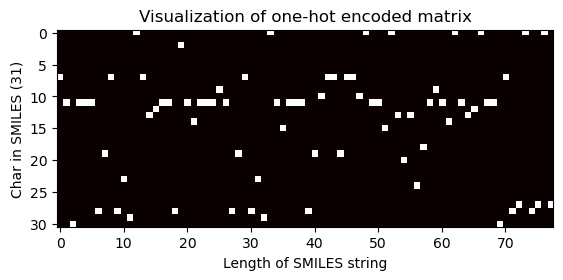

Shape of one-hot matrix :  (31, 78)
Associated canonical SMILES:  Cc1ccc(NC(=O)Cn2cc(-c3ccc4c(NC(=O)c5ccc(N6CCNCC6)cc5)n[nH]c4c3)cn2)cc1C(F)(F)F


In [46]:
# 通过最长SMILES字符串的索引对矩阵进行可视化
one_hot_matrix_plot(
    df.iloc[longest_smiles_index[0]]["unique_char_ohe_matrix"], unique_char, longest_smiles
)

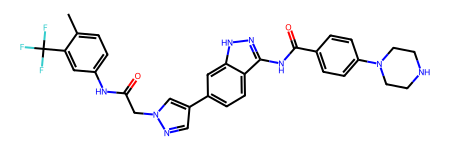

In [47]:
# 绘制具有最长SMILES的分子
longest_smiles_mol = Chem.MolFromSmiles(longest_smiles)
longest_smiles_mol

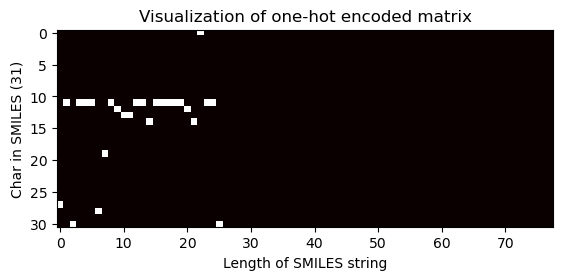

Shape of one-hot matrix :  (31, 78)
Associated canonical SMILES:  Fc1ccc(Nc2nncc3ccccc23)cc1


In [48]:
# 通过最短SMILES字符串的索引对矩阵进行可视化
one_hot_matrix_plot(
    df.iloc[shortest_smiles_index[0]]["unique_char_ohe_matrix"], unique_char, shortest_smiles
)

从上方，使用 matplotlib `imshow` 函数进行了矩阵可视化，我们也可以使用 `numpy.matrix` 函数可视化整个矩阵，例如下面所示的最长 SMILES 字符串的 one-hot 编码矩阵。

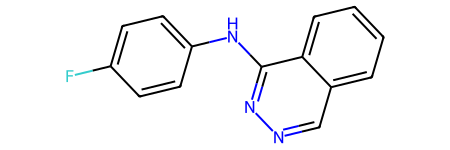

In [49]:
# 用最短的SMILES绘制分子
shortest_smiles_mol = Chem.MolFromSmiles(shortest_smiles)
shortest_smiles_mol

In [50]:
# 为具有最长微笑的分子打印矩阵的某些行
np.set_printoptions(threshold=np.inf)
subset = 3
unique_char = list(unique_char)
print(
    f"First {subset} rows of the ohe matrix, representing the characters {unique_char[0:subset]}\n"
)
print(np.matrix(df.iloc[longest_smiles_index[0]]["unique_char_ohe_matrix"])[0:subset, :])

First 3 rows of the ohe matrix, representing the characters [')', 'Z', '-']

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


在计算机辅助药物发现和开发的领域中，机器学习技术已被用于新型药物候选人的开发。设计药物靶点和新型药物发现的方法现在通常结合机器学习和深度学习算法，以提高开发输出的效率、功效和质量。

但与任何机器学习或深度学习算法合作时，输入数据应采用机器可读格式。在计算机辅助药物设计中，我们主要处理分类或文本数据，我们处理的是以 SMILES 字符串格式表示的药物分子，因此我们必须将这些分类数据转换为数值格式。

单热编码是一种流行且高效的编码技术，它将数据转换为数值格式。它可以在应用任何机器学习或深度学习算法之前作为重要的预处理步骤。

在这个文章中，我们在预处理数据后应用了一维热编码，以克服一些不足，例如：

- 确保一热编码矩阵的维度相等，因为 SMILES 字符串可能具有不等的维度，因为它们的字符串长度可能不同，并且对于大多数机器学习应用，在整个数据集中保持相等的维度是必需的。
- 替换两个字符元素，如 `Cl` ，为一个字符，因为在独热编码时，它将 `Cl` 拆分为两个字符，即 `C` 和 `l` ，这可能导致差异。
- 寻找数据集中独特的字符以生成更稀疏的单热编码矩阵。

一热编码在各个领域有多个应用，例如：

- 机器学习（神经网络）：在机器学习中，独热编码是一种常用于处理分类数据的方法，因为许多机器学习模型需要它们的输入变量是数值型的。
- 自然语言处理（NLP）：对于 NLP，大多数情况下数据由具有分类性质的词库组成。假设我们有一个大小为 N 的词汇表。在一维编码技术中，我们将单词映射到长度为 n 的向量，其中 n 位是特定单词存在的指示符。每个向量的 n 位指示词汇表中的 n 个单词的存在。例如，如果我们正在将单词转换为单热编码格式，那么我们将看到如 [0000…100],[0000…010],[0000…001] 这样的向量，等等。使用这种技术，正常句子可以表示为向量，然后可以对这种向量形式进行数值运算。
- 生物信息学：在生物信息学中，一维编码技术用于将 DNA 或蛋白质序列转换为数值格式，以便于进行生物信息学分析。

在本教程中，我们展示了如何使用 Python 实现一维单热编码，并展示了如何使用 `imshow` 函数可视化矩阵。我们还展示了如何使用 `numpy.matrix` 函数可视化整个矩阵。  